In [1]:
# importing libraries 
import pandas as pd 
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt 
import ast

#loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US Data Analyst roles

In [3]:
df_DA_US = df[(df['job_country'] == "United States") & (df['job_title_short']== 'Data Analyst')] 

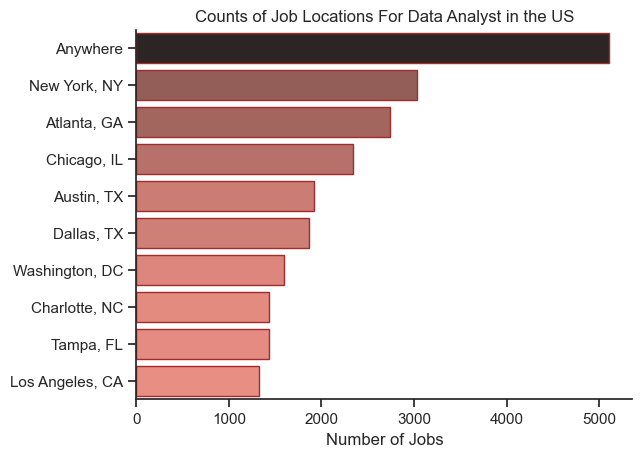

In [22]:
 df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:salmon_r',legend=False, edgecolor='brown')
sns.despine()
plt.title("Counts of Job Locations For Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

ValueError: 'paste1' is not a valid palette name

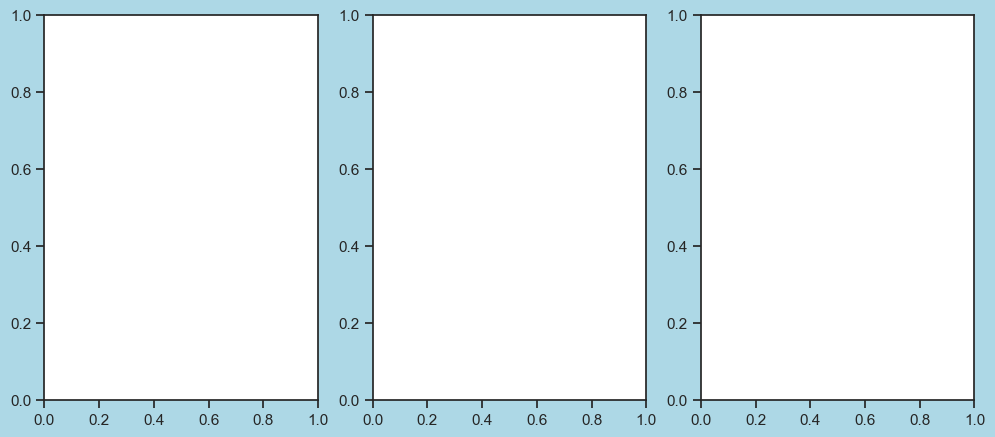

In [66]:

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}
fig, ax = plt.subplots(1, len(dict_column), figsize=(12,5))
fig.patch.set_facecolor('lightblue')
ax= ax.flatten()
#colors = ['#66b3ff','#ff9999']
palette = sns.color_palette('paste1', n_colors=2)
for i, (column, title) in enumerate(dict_column.items()):
   ax[i].pie(df_DA_US[column].value_counts(),labels=['False','True'], startangle=90, autopct='%1.1f%%',colors=palette)
   ax[i].set_title(title)
   


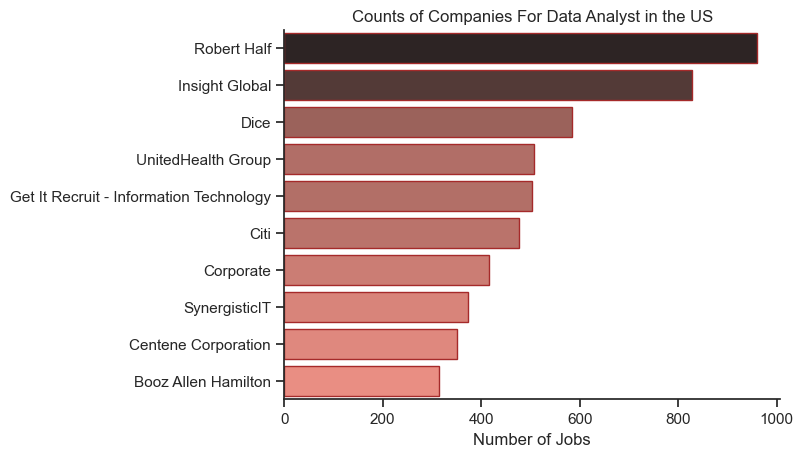

In [59]:
 df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:salmon_r',legend=False, edgecolor='brown')
sns.despine()
plt.title("Counts of Companies For Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()